# Setup the Env


In [1]:
import sys
import os

import sagemaker
from sagemaker import get_execution_role

# Add the parent directory to the sys.path
sys.path.insert(0, os.path.abspath(".."))

# Define IAM role
role = get_execution_role()
role

# Establish S3 bucket connection
import boto3

s3 = boto3.client("s3")
bucket = "capstone-bucket-4-friends"

# Take a look at current dir
print(os.getcwd())

from file_utilities import s3_download

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
/home/sagemaker-user/capstone-2024-summer/src/rachel


# Import libraries


In [2]:
# standard libraries
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt

!pip install seaborn -q
import seaborn as sns

# Download Data from S3 as needed


In [3]:
# crsp = "CRSP/crsp_2018-2023.csv"
# crsp_path = s3_download(crsp)

In [4]:
# index = "Index/security_master.csv"
# index_path = s3_download(index)

# Load the dataset

https://www.crsp.org/wp-content/uploads/guides/CRSP_US_Stock_&_Indexes_Database_Data_Descriptions_Guide.pdf


In [5]:
dtype_dict = {
    "permno_id": "object",
    "ncusip_id": "object",
    "cusip_id": "object",
    "ticker": "object",
    "share_code": "object",
    "share_code_type": "object",
    "share_code_detail": "object",
    "exchange_code": "object",
    "company_name": "object",
    "primary_exchange": "object",
    "trading_status": "object",
    "security_status": "object",
    "naics": "object",
    "naics_sector": "object",
    "naics_sector_name": "object",
    "naics_secondary": "object",
    "ask_or_high_price": "float64",
    "ask_price": "float64",
    "bid_or_low_price": "float64",
    "bid_price": "float64",
    "open_price": "float64",
    "close_price": "float64",
    "return": "float64",
    "volume": "int64",
    "shares_outstanding": "int64",
    "num_trades": "int64",
    "factor_to_adjust_price": "float64",
    "factor_to_adjust_shares": "float64",
    "value_weighted_return": "float64",
    "equal_weighted_return": "float64",
    "return_on_SP_index": "float64",
}

In [6]:
crsp_df = pd.read_csv(
    "/home/sagemaker-user/capstone-2024-summer/data/crsp_2018-2023_clean.csv",
    dtype=dtype_dict,
    parse_dates=["date"],
)

crsp_df.head()

,date,permno_id,ncusip_id,cusip_id,ticker,share_code,share_code_type,share_code_detail,exchange_code,company_name,...,close_price,return,volume,shares_outstanding,num_trades,factor_to_adjust_price,factor_to_adjust_shares,value_weighted_return,equal_weighted_return,return_on_SP_index
0,2018-01-02,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,149.17999,-0.017454,190618,18668,1036,1.0,1.0,0.008505,0.011232,0.008303
1,2018-01-03,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,147.69000,-0.009988,63693,18668,1283,1.0,1.0,0.005856,0.005103,0.006399
2,2018-01-04,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,149.73000,0.013813,127552,18668,1138,1.0,1.0,0.004001,0.005272,0.004029
3,2018-01-05,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,148.30000,-0.009550,44647,18668,745,1.0,1.0,0.005804,0.003880,0.007034
4,2018-01-08,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,148.41000,0.000742,55014,18668,990,1.0,1.0,0.001816,0.000584,0.001662


# Take a look at the columns


In [7]:
crsp_df.columns

Index(['date', 'permno_id', 'ncusip_id', 'cusip_id', 'ticker', 'share_code',
       'share_code_type', 'share_code_detail', 'exchange_code', 'company_name',
       'primary_exchange', 'trading_status', 'security_status', 'naics',
       'naics_sector', 'naics_sector_name', 'naics_secondary',
       'ask_or_high_price', 'ask_price', 'bid_or_low_price', 'bid_price',
       'open_price', 'close_price', 'return', 'volume', 'shares_outstanding',
       'num_trades', 'factor_to_adjust_price', 'factor_to_adjust_shares',
       'value_weighted_return', 'equal_weighted_return', 'return_on_SP_index'],
      dtype='object')

In [8]:
crsp_df.dtypes

date                       datetime64[ns]
permno_id                          object
ncusip_id                          object
cusip_id                           object
ticker                             object
share_code                         object
share_code_type                    object
share_code_detail                  object
exchange_code                      object
company_name                       object
primary_exchange                   object
trading_status                     object
security_status                    object
naics                              object
naics_sector                       object
naics_sector_name                  object
naics_secondary                    object
ask_or_high_price                 float64
ask_price                         float64
bid_or_low_price                  float64
bid_price                         float64
open_price                        float64
close_price                       float64
return                            

In [9]:
og_crsp_len = len(crsp_df)
og_crsp_cols = len(crsp_df.columns)
print("number of records:", og_crsp_len)
print("number of columns:", og_crsp_cols)

number of records: 7658914
number of columns: 32


# Inspect the Return values to check for invalid Returns

- -66.0: more than 10 periods between time t and the time of the preceding price t?
- -77.0: not trading on the current exchange at time t
- -88.0: no return, array index t not within range of BEGRET and ENDRET
- -99.0: missing return due to missing price at time t


In [10]:
sorted(crsp_df["return"].unique())[:10]

[-3.0820512820512818,
 -2.629222309505106,
 -2.0092592592592595,
 -1.9595216191352347,
 -1.8800729594163248,
 -0.954306,
 -0.944835,
 -0.934069,
 -0.928571,
 -0.922714]

In [11]:
sorted(crsp_df["return"].unique())[-10:]

[26.184466019417474,
 30.702728127939796,
 31.445036642238502,
 34.96287703016241,
 39.725304,
 44.58282208588957,
 50.9913674710614,
 62.899,
 73.331875,
 109.90573012939]

## A1. Apply log transformation to the Return


In [12]:
# Function to safely calculate log return (to account for returns < -1)
def safe_log1p(x):
    return np.log1p(x) if x > -1 else np.log1p(-0.999999)

In [13]:
crsp_df["log_return"] = crsp_df["return"].apply(safe_log1p)

In [14]:
crsp_df["return"][:5]

0   -0.017454
1   -0.009988
2    0.013813
3   -0.009550
4    0.000742
Name: return, dtype: float64

In [15]:
crsp_df["log_return"][:5]

0   -0.017608
1   -0.010038
2    0.013718
3   -0.009596
4    0.000742
Name: log_return, dtype: float64

## A2. Also calculate the absolute log return


In [16]:
crsp_df["abs_log_return"] = crsp_df["log_return"].abs()

In [17]:
crsp_df["abs_log_return"][:5]

0    0.017608
1    0.010038
2    0.013718
3    0.009596
4    0.000742
Name: abs_log_return, dtype: float64

# Inspect a few stocks that we know had extreme volatility

- NVIDIA
- Tesla
- GameStop


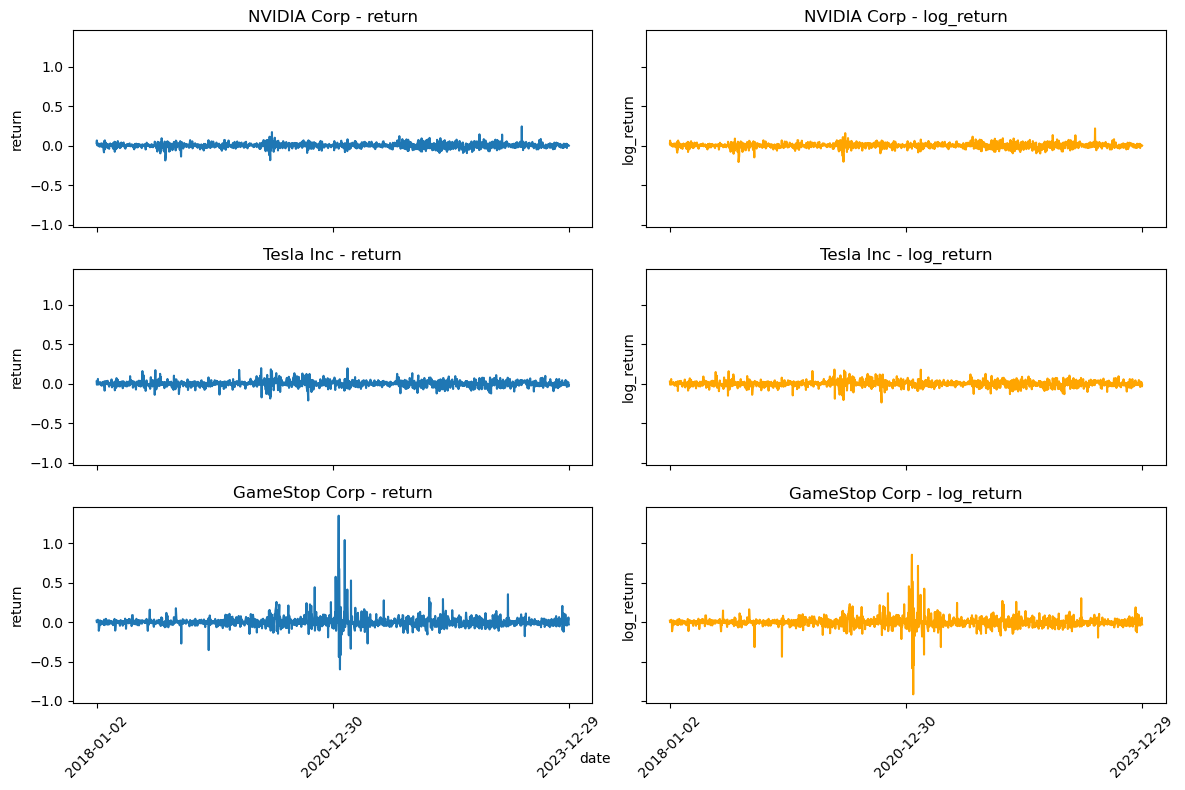

In [18]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.reshape(3, 2)
desired_dates = ["2018-01-02", "2020-12-30", "2023-12-29"]

# Plot each id
for row, (id_value, comnam) in enumerate(zip(["NVDA", "TSLA", "GME"], ["NVIDIA Corp", "Tesla Inc", "GameStop Corp"])):
    subset = crsp_df[crsp_df["ticker"] == id_value]

    # Plot return
    axes[row, 0].plot(subset["date"], subset["return"], label="return")
    axes[row, 0].set_title(f"{comnam} - return")
    axes[row, 0].set_ylabel("return")
    axes[row, 0].set_xticks(desired_dates)
    axes[row, 0].set_xticklabels(desired_dates, rotation=45)

    # Plot log_return
    axes[row, 1].plot(subset["date"], subset["log_return"], label="log_return", color="orange")
    axes[row, 1].set_title(f"{comnam} - log_return")
    axes[row, 1].set_ylabel("log_return")
    axes[row, 1].set_xticks(desired_dates)
    axes[row, 1].set_xticklabels(desired_dates, rotation=45)

# Adjust layout for better visualization
fig.text(0.5, 0.04, "date", ha="center")
plt.tight_layout()
plt.show()

# Create additional features similar to the reference paper

- B1. The log returns of the sector corresponding to each stock, calculated using the weighted average stock prices in the sector
- B2. The log returns of the sector corresponding to each stock, calculated using the arithmetic average stock prices in the sector
- B3. The log market log returns, calculated using the weighted average of all the stocks in our dataset
- B4. The log market log returns, calculated using the arithmetic average of all the stocks in our dataset


## B0. Calculate the market cap & weighted price for each stock


In [19]:
crsp_df["market_cap"] = (crsp_df["shares_outstanding"] * crsp_df["close_price"]).round(6)

In [20]:
crsp_df["weighted_price"] = (crsp_df["close_price"] * crsp_df["market_cap"]).round(6)

## B1. Calculate the log returns of the sector corresponding to each stock, calculated using the weighted average stock prices in the sector


In [21]:
# First, group the data by sector & date
grouped = crsp_df.groupby(["naics_sector", "date"]).agg({"weighted_price": "sum", "market_cap": "sum"}).reset_index()

# Then, calculate the weighted average price
grouped["weighted_avg_price"] = grouped["weighted_price"] / grouped["market_cap"]

# Then, calculate the log return for each sector
grouped["weighted_avg_price_shifted"] = grouped.groupby("naics_sector")["weighted_avg_price"].shift(1)
grouped["sector_weighted_avg_log_return"] = (
    np.log(grouped["weighted_avg_price"] / grouped["weighted_avg_price_shifted"]).fillna(0)
).round(6)

grouped.head()

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,naics_sector,date,weighted_price,market_cap,weighted_avg_price,weighted_avg_price_shifted,sector_weighted_avg_log_return
0,10,2021-03-29,1.726645e+07,3039867.84,5.68,NaN,0.000000
1,10,2021-03-30,1.601331e+07,2927478.36,5.47,5.68,-0.037673
2,10,2021-03-31,1.732730e+07,3045219.72,5.69,5.47,0.039432
3,10,2021-04-01,1.881983e+07,3173664.84,5.93,5.69,0.041314
4,10,2021-04-05,1.856680e+07,3152257.32,5.89,5.93,-0.006768


In [22]:
# Merge the sector log returns back to the original dataframe
crsp_df = crsp_df.merge(
    grouped[["date", "naics_sector", "sector_weighted_avg_log_return"]],
    on=["date", "naics_sector"],
    how="left",
)

crsp_df.head()

,date,permno_id,ncusip_id,cusip_id,ticker,share_code,share_code_type,share_code_detail,exchange_code,company_name,...,factor_to_adjust_price,factor_to_adjust_shares,value_weighted_return,equal_weighted_return,return_on_SP_index,log_return,abs_log_return,market_cap,weighted_price,sector_weighted_avg_log_return
0,2018-01-02,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,1.0,1.0,0.008505,0.011232,0.008303,-0.017608,0.017608,2.784892e+06,4.154502e+08,0.000000
1,2018-01-03,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,1.0,1.0,0.005856,0.005103,0.006399,-0.010038,0.010038,2.757077e+06,4.071927e+08,0.004333
2,2018-01-04,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,1.0,1.0,0.004001,0.005272,0.004029,0.013718,0.013718,2.795160e+06,4.185193e+08,-0.002669
3,2018-01-05,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,1.0,1.0,0.005804,0.003880,0.007034,-0.009596,0.009596,2.768464e+06,4.105633e+08,-0.007082
4,2018-01-08,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,1.0,1.0,0.001816,0.000584,0.001662,0.000742,0.000742,2.770518e+06,4.111726e+08,-0.005134


## B2. Calculate the log returns of the sector corresponding to each stock, calculated using the arithmetic average stock prices in the sector


In [23]:
# First, group the data by sector & date
grouped = (
    crsp_df.groupby(["naics_sector", "date"])
    .agg({"close_price": "mean"})
    .reset_index()
    .rename(columns={"close_price": "avg_price"})
)

# Then, calculate the log return for each sector
grouped["avg_price_Shifted"] = grouped.groupby("naics_sector")["avg_price"].shift(1)
grouped["sector_simple_avg_log_return"] = (np.log(grouped["avg_price"] / grouped["avg_price_Shifted"]).fillna(0)).round(
    6
)

grouped.head()

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,naics_sector,date,avg_price,avg_price_Shifted,sector_simple_avg_log_return
0,10,2021-03-29,5.68,NaN,0.000000
1,10,2021-03-30,5.47,5.68,-0.037673
2,10,2021-03-31,5.69,5.47,0.039432
3,10,2021-04-01,5.93,5.69,0.041314
4,10,2021-04-05,5.89,5.93,-0.006768


In [24]:
# Merge the sector log returns back to the original dataframe
crsp_df = crsp_df.merge(
    grouped[["date", "naics_sector", "sector_simple_avg_log_return"]],
    on=["date", "naics_sector"],
    how="left",
)

crsp_df.head()

,date,permno_id,ncusip_id,cusip_id,ticker,share_code,share_code_type,share_code_detail,exchange_code,company_name,...,factor_to_adjust_shares,value_weighted_return,equal_weighted_return,return_on_SP_index,log_return,abs_log_return,market_cap,weighted_price,sector_weighted_avg_log_return,sector_simple_avg_log_return
0,2018-01-02,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,1.0,0.008505,0.011232,0.008303,-0.017608,0.017608,2.784892e+06,4.154502e+08,0.000000,0.000000
1,2018-01-03,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,1.0,0.005856,0.005103,0.006399,-0.010038,0.010038,2.757077e+06,4.071927e+08,0.004333,-0.060827
2,2018-01-04,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,1.0,0.004001,0.005272,0.004029,0.013718,0.013718,2.795160e+06,4.185193e+08,-0.002669,0.053686
3,2018-01-05,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,1.0,0.005804,0.003880,0.007034,-0.009596,0.009596,2.768464e+06,4.105633e+08,-0.007082,-0.013394
4,2018-01-08,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,1.0,0.001816,0.000584,0.001662,0.000742,0.000742,2.770518e+06,4.111726e+08,-0.005134,0.016097


## B3. Calculate the log market log returns, calculated using the weighted average of all the stocks in our dataset


In [25]:
crsp_df["weighted_avg_log_return"] = (
    crsp_df["log_return"] * crsp_df["market_cap"] / crsp_df["market_cap"].sum()
).round(6)

## B4. Calculate the log market log returns, calculated using the arithmetic average of all the stocks in our dataset


In [26]:
crsp_df["simple_avg_log_return"] = (crsp_df["log_return"].mean()).round(6)

In [27]:
crsp_df.head()

,date,permno_id,ncusip_id,cusip_id,ticker,share_code,share_code_type,share_code_detail,exchange_code,company_name,...,equal_weighted_return,return_on_SP_index,log_return,abs_log_return,market_cap,weighted_price,sector_weighted_avg_log_return,sector_simple_avg_log_return,weighted_avg_log_return,simple_avg_log_return
0,2018-01-02,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.011232,0.008303,-0.017608,0.017608,2.784892e+06,4.154502e+08,0.000000,0.000000,-0.0,-0.000641
1,2018-01-03,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.005103,0.006399,-0.010038,0.010038,2.757077e+06,4.071927e+08,0.004333,-0.060827,-0.0,-0.000641
2,2018-01-04,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.005272,0.004029,0.013718,0.013718,2.795160e+06,4.185193e+08,-0.002669,0.053686,0.0,-0.000641
3,2018-01-05,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.003880,0.007034,-0.009596,0.009596,2.768464e+06,4.105633e+08,-0.007082,-0.013394,-0.0,-0.000641
4,2018-01-08,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.000584,0.001662,0.000742,0.000742,2.770518e+06,4.111726e+08,-0.005134,0.016097,0.0,-0.000641


# Create additional labels similar to the reference paper

- C1. Calculate log returns & absolute log returns 7, 14, and 28 in the future for each reference date
- C2. Calculate volatility 7, 14 and 28 days in the future for each reference date


## C1. Calculate log returns & absolute log returns 7, 14, and 28 in the future for each reference date


In [28]:
# Ensure the DataFrame is sorted by permno_id and date
crsp_df = crsp_df.sort_values(by=["permno_id", "date"]).reset_index(drop=True)


# Function to safely calculate log return
def safe_log1p(x):
    return np.log1p(x) if x > -1 else np.log1p(-0.999999)


# Set the last n elements to 0 for each permno_id group
def set_last_n_to_zero(df, n):
    df.iloc[-n:, df.columns.get_loc(f"price_{n}")] = 0
    df.iloc[-n:, df.columns.get_loc(f"return_{n}")] = 0
    df.iloc[-n:, df.columns.get_loc(f"log_return_{n}")] = 0
    df.iloc[-n:, df.columns.get_loc(f"abs_log_return_{n}")] = 0
    return df


# Calculate annualized log returns & absolute log returns 7, 14, and 28 in the future for each reference date
for n in [7, 14, 28]:
    crsp_df[f"price_{n}"] = crsp_df.groupby("permno_id")["close_price"].shift(-n)
    crsp_df[f"return_{n}"] = (crsp_df[f"price_{n}"] / crsp_df["close_price"] - 1) * (252 / n)
    crsp_df[f"log_return_{n}"] = crsp_df[f"return_{n}"].apply(safe_log1p)
    crsp_df[f"abs_log_return_{n}"] = crsp_df[f"log_return_{n}"].abs()
    crsp_df = crsp_df.groupby("permno_id").apply(set_last_n_to_zero, n=n).reset_index(drop=True)

crsp_df.head()

,date,permno_id,ncusip_id,cusip_id,ticker,share_code,share_code_type,share_code_detail,exchange_code,company_name,...,log_return_7,abs_log_return_7,price_14,return_14,log_return_14,abs_log_return_14,price_28,return_28,log_return_28,abs_log_return_28
0,2018-01-02,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,-0.980868,0.980868,150.22,0.125487,0.118216,0.118216,134.24001,-0.901326,-2.315935,2.315935
1,2018-01-03,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,-0.342585,0.342585,148.36,0.081658,0.078495,0.078495,134.61000,-0.797075,-1.594919,1.594919
2,2018-01-04,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,-1.339902,1.339902,150.92,0.143058,0.133707,0.133707,138.36000,-0.683430,-1.150211,1.150211
3,2018-01-05,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.647269,0.647269,148.73,0.052192,0.050875,0.050875,138.78000,-0.577748,-0.862153,0.862153
4,2018-01-08,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.408494,0.408494,149.55,0.138266,0.129506,0.129506,139.10001,-0.564584,-0.831453,0.831453


In [29]:
crsp_df[["close_price", "price_7", "return_7", "log_return_7", "abs_log_return_7"]][:10]

,close_price,price_7,return_7,log_return_7,abs_log_return_7
0,149.17999,146.59000,-0.625014,-0.980868,0.980868
1,147.69000,146.50000,-0.290067,-0.342585,0.342585
2,149.73000,146.66000,-0.738129,-1.339902,1.339902
3,148.30000,152.05000,0.910317,0.647269,0.647269
4,148.41000,150.49001,0.504551,0.408494,0.408494
5,147.34000,153.80000,1.578390,0.947165,0.947165
6,145.46001,149.75000,1.061733,0.723547,0.723547
7,146.59000,150.22000,0.891466,0.637352,0.637352
8,146.50000,148.36000,0.457065,0.376424,0.376424
9,146.66000,150.92000,1.045684,0.715732,0.715732


In [30]:
crsp_df[["close_price", "price_7", "return_7", "log_return_7", "abs_log_return_7"]][-10:]

,close_price,price_7,return_7,log_return_7,abs_log_return_7
7658904,253.50000,261.44000,1.127574,0.754982,0.754982
7658905,252.08000,253.17999,0.157092,0.145910,0.145910
7658906,257.22000,248.48000,-1.223233,-13.815511,13.815511
7658907,247.14000,0.00000,0.000000,0.000000,0.000000
7658908,254.50000,0.00000,0.000000,0.000000,0.000000
7658909,252.53999,0.00000,0.000000,0.000000,0.000000
7658910,256.60999,0.00000,0.000000,0.000000,0.000000
7658911,261.44000,0.00000,0.000000,0.000000,0.000000
7658912,253.17999,0.00000,0.000000,0.000000,0.000000
7658913,248.48000,0.00000,0.000000,0.000000,0.000000


## C2. Calculate volatility 7, 14 and 28 days in the future for each reference date


In [31]:
# Set the last n elements to 0 for each permno_id group
def set_last_n_to_zero(df, n):
    df.iloc[-n:, df.columns.get_loc(f"volatility_{n}")] = 0
    return df


# Calculate rolling standard deviation (volatility) and annualize it
for n in [7, 14, 28]:
    crsp_df[f"volatility_{n}"] = (
        crsp_df.groupby("permno_id")["log_return"].rolling(window=n).std().reset_index(0, drop=True)
    )
    crsp_df[f"volatility_{n}"] = crsp_df[f"volatility_{n}"].shift(-n) * np.sqrt(252)
    crsp_df = crsp_df.groupby("permno_id").apply(set_last_n_to_zero, n=n).reset_index(drop=True)

crsp_df.head()

,date,permno_id,ncusip_id,cusip_id,ticker,share_code,share_code_type,share_code_detail,exchange_code,company_name,...,return_14,log_return_14,abs_log_return_14,price_28,return_28,log_return_28,abs_log_return_28,volatility_7,volatility_14,volatility_28
0,2018-01-02,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.125487,0.118216,0.118216,134.24001,-0.901326,-2.315935,2.315935,0.160708,0.251431,0.322190
1,2018-01-03,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.081658,0.078495,0.078495,134.61000,-0.797075,-1.594919,1.594919,0.151850,0.253598,0.322152
2,2018-01-04,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.143058,0.133707,0.133707,138.36000,-0.683430,-1.150211,1.150211,0.114113,0.257447,0.331450
3,2018-01-05,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.052192,0.050875,0.050875,138.78000,-0.577748,-0.862153,0.862153,0.250402,0.262128,0.331206
4,2018-01-08,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.138266,0.129506,0.129506,139.10001,-0.564584,-0.831453,0.831453,0.264054,0.263091,0.331376


In [32]:
crsp_df[["close_price", "price_7", "return_7", "volatility_7"]][:10]

,close_price,price_7,return_7,volatility_7
0,149.17999,146.59000,-0.625014,0.160708
1,147.69000,146.50000,-0.290067,0.151850
2,149.73000,146.66000,-0.738129,0.114113
3,148.30000,152.05000,0.910317,0.250402
4,148.41000,150.49001,0.504551,0.264054
5,147.34000,153.80000,1.578390,0.278425
6,145.46001,149.75000,1.061733,0.326316
7,146.59000,150.22000,0.891466,0.325359
8,146.50000,148.36000,0.457065,0.339113
9,146.66000,150.92000,1.045684,0.351107


In [33]:
crsp_df[["close_price", "price_7", "return_7", "volatility_7"]][-10:]

,close_price,price_7,return_7,volatility_7
7658904,253.50000,261.44000,1.127574,0.379304
7658905,252.08000,253.17999,0.157092,0.437523
7658906,257.22000,248.48000,-1.223233,0.426621
7658907,247.14000,0.00000,0.000000,0.000000
7658908,254.50000,0.00000,0.000000,0.000000
7658909,252.53999,0.00000,0.000000,0.000000
7658910,256.60999,0.00000,0.000000,0.000000
7658911,261.44000,0.00000,0.000000,0.000000
7658912,253.17999,0.00000,0.000000,0.000000
7658913,248.48000,0.00000,0.000000,0.000000


# Confirm no data issues

In [34]:
checks = [
    "return",
    "log_return",
    "abs_log_return",
    "sector_weighted_avg_log_return",
    "sector_simple_avg_log_return",
    "weighted_avg_log_return",
    "simple_avg_log_return",
    "return_7",
    "log_return_7",
    "abs_log_return_7",
    "return_14",
    "log_return_14",
    "abs_log_return_14",
    "return_28",
    "log_return_28",
    "abs_log_return_28",
    "volatility_7",
    "volatility_14",
    "volatility_28",
]

In [35]:
assert len(crsp_df[crsp_df.isnull().any(axis=1)]) == 0

In [36]:
assert len(crsp_df[np.isinf(crsp_df[checks]).any(axis=1)]) == 0

# Take a final look at the columns


In [37]:
crsp_df.columns

Index(['date', 'permno_id', 'ncusip_id', 'cusip_id', 'ticker', 'share_code',
       'share_code_type', 'share_code_detail', 'exchange_code', 'company_name',
       'primary_exchange', 'trading_status', 'security_status', 'naics',
       'naics_sector', 'naics_sector_name', 'naics_secondary',
       'ask_or_high_price', 'ask_price', 'bid_or_low_price', 'bid_price',
       'open_price', 'close_price', 'return', 'volume', 'shares_outstanding',
       'num_trades', 'factor_to_adjust_price', 'factor_to_adjust_shares',
       'value_weighted_return', 'equal_weighted_return', 'return_on_SP_index',
       'log_return', 'abs_log_return', 'market_cap', 'weighted_price',
       'sector_weighted_avg_log_return', 'sector_simple_avg_log_return',
       'weighted_avg_log_return', 'simple_avg_log_return', 'price_7',
       'return_7', 'log_return_7', 'abs_log_return_7', 'price_14', 'return_14',
       'log_return_14', 'abs_log_return_14', 'price_28', 'return_28',
       'log_return_28', 'abs_log_retur

In [38]:
crsp_df.dtypes

date                              datetime64[ns]
permno_id                                 object
ncusip_id                                 object
cusip_id                                  object
ticker                                    object
share_code                                object
share_code_type                           object
share_code_detail                         object
exchange_code                             object
company_name                              object
primary_exchange                          object
trading_status                            object
security_status                           object
naics                                     object
naics_sector                              object
naics_sector_name                         object
naics_secondary                           object
ask_or_high_price                        float64
ask_price                                float64
bid_or_low_price                         float64
bid_price           

In [39]:
crsp_len = len(crsp_df)
crsp_cols = len(crsp_df.columns)
print("number of records:", crsp_len)
print("number of columns:", crsp_cols)

number of records: 7658914
number of columns: 55


# Save the cleaned df as csv & parquet


In [40]:
crsp_df.to_csv(
    "/home/sagemaker-user/capstone-2024-summer/data/crsp_2018-2023_clean_2.csv",
    index=False,
)
crsp_df.to_parquet("/home/sagemaker-user/capstone-2024-summer/data/crsp_2018-2023_clean_2.parquet")

In [41]:
reload = pd.read_parquet("/home/sagemaker-user/capstone-2024-summer/data/crsp_2018-2023_clean_2.parquet")
assert crsp_df.equals(reload)

reload.head()

,date,permno_id,ncusip_id,cusip_id,ticker,share_code,share_code_type,share_code_detail,exchange_code,company_name,...,return_14,log_return_14,abs_log_return_14,price_28,return_28,log_return_28,abs_log_return_28,volatility_7,volatility_14,volatility_28
0,2018-01-02,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.125487,0.118216,0.118216,134.24001,-0.901326,-2.315935,2.315935,0.160708,0.251431,0.322190
1,2018-01-03,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.081658,0.078495,0.078495,134.61000,-0.797075,-1.594919,1.594919,0.151850,0.253598,0.322152
2,2018-01-04,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.143058,0.133707,0.133707,138.36000,-0.683430,-1.150211,1.150211,0.114113,0.257447,0.331450
3,2018-01-05,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.052192,0.050875,0.050875,138.78000,-0.577748,-0.862153,0.862153,0.250402,0.262128,0.331206
4,2018-01-08,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.138266,0.129506,0.129506,139.10001,-0.564584,-0.831453,0.831453,0.264054,0.263091,0.331376


# Upload the parquet to s3


In [42]:
s3.upload_file(
    "/home/sagemaker-user/capstone-2024-summer/data/crsp_2018-2023_clean_2.parquet",
    bucket,
    "CRSP/crsp_2018-2023_clean_2.parquet",
)

In [43]:
reload_path = s3_download("CRSP/crsp_2018-2023_clean_2.parquet")

In [44]:
reload = pd.read_parquet("/home/sagemaker-user/capstone-2024-summer/data/crsp_2018-2023_clean_2.parquet")
assert crsp_df.equals(reload)

reload.head()

,date,permno_id,ncusip_id,cusip_id,ticker,share_code,share_code_type,share_code_detail,exchange_code,company_name,...,return_14,log_return_14,abs_log_return_14,price_28,return_28,log_return_28,abs_log_return_28,volatility_7,volatility_14,volatility_28
0,2018-01-02,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.125487,0.118216,0.118216,134.24001,-0.901326,-2.315935,2.315935,0.160708,0.251431,0.322190
1,2018-01-03,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.081658,0.078495,0.078495,134.61000,-0.797075,-1.594919,1.594919,0.151850,0.253598,0.322152
2,2018-01-04,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.143058,0.133707,0.133707,138.36000,-0.683430,-1.150211,1.150211,0.114113,0.257447,0.331450
3,2018-01-05,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.052192,0.050875,0.050875,138.78000,-0.577748,-0.862153,0.862153,0.250402,0.262128,0.331206
4,2018-01-08,10026,46603210,46603210,JJSF,11.0,1,1,3,J & J SNACK FOODS CORP,...,0.138266,0.129506,0.129506,139.10001,-0.564584,-0.831453,0.831453,0.264054,0.263091,0.331376
